# Hands On Session: Autoencoders, and Machine Learning
# By: Sabera Talukder

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SaberaTalukder/Chen_Institute_DataSAI_for_Neuroscience/blob/main/07_08_22_day4_autoencoders_and_ML_introduction/code/solutions/solutions_autoencoders_and_machine_learning.ipynb)

In [1]:
import matplotlib.pyplot as plt
import mne
import numpy as np
import xarray as xr

from sklearn.decomposition import PCA

# Load Data

#### Download the Location Data

In [2]:
elec_loc_path = '/Users/Albert/Desktop/sabera_chen/Chen_Institute_DataSAI_for_Neuroscience/07_08_22_day4_autoencoders_and_ML_introduction/data/electrode_location_dictionary.npy'
elec_loc_dict_arr = np.load(elec_loc_path, allow_pickle=True)
elec_loc_dict = elec_loc_dict_arr.item()

#### Download Data for Pt2, Pt4, Pt5, Pt9 From Here: https://figshare.com/articles/dataset/Naturalistic_ECoG_move_v_rest/13010546

In [3]:
# Once you have downloaded the 4 datasets from above, load the data for each day
base_path = '/Users/Albert/Desktop/sabera_chen/Chen_Institute_DataSAI_for_Neuroscience/07_08_22_day4_autoencoders_and_ML_introduction/data/'

In [5]:
def load_data_array(base_path, filename):
    full_data = xr.open_dataset(base_path + filename)
    full_data_array = full_data.to_array()
    data_array = full_data_array[0, :, :-1, :]
    # note rest = 1, and move = 2
    event_labels = full_data_array[0, :, -1, 0]
    
    return data_array, event_labels

In [6]:
pt2_data, pt2_labels = load_data_array(base_path, 'EC02_ecog_data.nc')
pt4_data, pt4_labels = load_data_array(base_path, 'EC04_ecog_data.nc')
pt5_data, pt5_labels = load_data_array(base_path, 'EC05_ecog_data.nc')
pt9_data, pt9_labels = load_data_array(base_path, 'EC09_ecog_data.nc')

## Now let's do some data exploration and visualization with everything we just loaded into our notebook! 🤓

### What are the keys in the elec_loc_dict dictionary? What do these keys represent?

In [7]:
# Enter Code Here:

In [8]:
# Solution:
elec_loc_dict.keys()
# The keys represent the patient number

dict_keys(['pt2', 'pt4', 'pt5', 'pt9'])

### For each key the dictionary contains a list of length 2. What does the first element represent? What does the second element represent?

#### Hint: you may have to inspect the data from all the dictionary keys to figure out what each element represents!

In [9]:
# Enter Code Here:

In [10]:
# Solution:
# The following code block demonstrates that the value for each dictionary key is of length 2
print(len(elec_loc_dict['pt2']))
print(len(elec_loc_dict['pt4']))
print(len(elec_loc_dict['pt5']))
print(len(elec_loc_dict['pt9']))
print('')

# The following code block shows the first element in each list
# Since this is neuroscience data we can intuit that R = R hemisphere, and L = L hemisphere
print(elec_loc_dict['pt2'][0])
print(elec_loc_dict['pt4'][0])
print(elec_loc_dict['pt5'][0])
print(elec_loc_dict['pt9'][0])
print('')

# The following code block shows that the second element in each list is an array of several dimensions by 3
# This array is the electrode locations for the 4 patients that we have the 3 dimensions are x, y, z
print(elec_loc_dict['pt2'][1].shape)
print(elec_loc_dict['pt4'][1].shape)
print(elec_loc_dict['pt5'][1].shape)
print(elec_loc_dict['pt9'][1].shape)

2
2
2
2

R
R
R
L

(85, 3)
(83, 3)
(105, 3)
(125, 3)


### Now make a scatter plot using the second element in each list. Since there are elements from 4 different lists that you're going to be plotting, give the items from each list a different color!

In [11]:
# Enter Code Here:

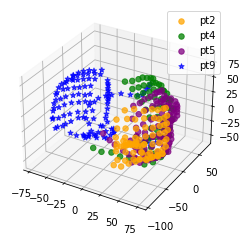

In [12]:
# Solutions:

# Visualize the electrode data in 3d
%matplotlib inline
# %matplotlib notebook <-- uncomment this to interact with your 3D plot. Won't play nice in colab.

colors = ['orange', 'green', 'purple', 'blue']
ax = plt.axes(projection='3d')

for i, (key, value) in enumerate(elec_loc_dict.items()):
    if value[0] == 'R':
        m = 'o'
    elif value[0] == 'L':
        m ='*'    
    _ = ax.scatter3D(value[1][:, 0], value[1][:, 1], value[1][:, 2], c=colors[i], alpha=0.75, s=30, marker=m)
    
_ = ax.legend(['pt2', 'pt4', 'pt5', 'pt9'])

### Now let's explore the patient data and patient labels that we loaded into our notebooks!!
#### What are the dimensions of the patient data and patient label arrays that we loaded into out notebook? What do these dimensions represent?

In [14]:
# Enter Code Here:

In [15]:
# Solution:
print(pt2_data.shape, pt2_labels.shape)
print(pt4_data.shape, pt4_labels.shape)
print(pt5_data.shape, pt5_labels.shape)
print(pt9_data.shape, pt9_labels.shape)
# These data dimensions represent time series instance, electrode number, and time steps
# the label dimensions represent the label for each time series instance

(418, 86, 1001) (418,)
(536, 84, 1001) (536,)
(406, 106, 1001) (406,)
(302, 126, 1001) (302,)


### Plot a histogram of each patient's labels.
#### Are these labels consistent across patients? Do we need to do class rebalancing or are our classes equal?

In [ ]:
# Enter Code Here

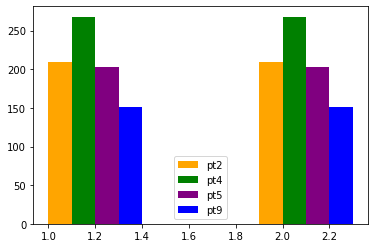

In [18]:
# Solution:
%matplotlib inline

offset = 0.1
_ = plt.hist(pt2_labels, color=colors[0])
_ = plt.hist(pt4_labels + 1*offset, color=colors[1])
_ = plt.hist(pt5_labels + 2*offset, color=colors[2])
_ = plt.hist(pt9_labels + 3*offset, color=colors[3])
_ = plt.legend(['pt2', 'pt4', 'pt5', 'pt9'])
_ = plt.show()

#### Download Data for Pt2, Pt4, Pt5, Pt9 From Here:
#### https://figshare.com/articles/dataset/Naturalistic_ECoG_move_v_rest/13010546

In [ ]:
# Once you have downloaded the 4 datasets from above, load the data for each day
base_path = '/Users/Albert/Desktop/sabera_chen/Chen_Institute_DataSAI_for_Neuroscience/07_08_22_day4_autoencoders_and_ML_introduction/data/'

In [ ]:
def load_data_array(base_path, filename):
    full_data = xr.open_dataset(base_path + filename)
    full_data_array = full_data.to_array()
    data_array = full_data_array[0, :, :-1, :]
    # note rest = 1, and move = 2
    event_labels = full_data_array[0, :, -1, 0]
    
    return data_array, event_labels

In [ ]:
pt2_data, pt2_labels = load_data_array(base_path, 'EC02_ecog_data.nc')
pt4_data, pt4_labels = load_data_array(base_path, 'EC04_ecog_data.nc')
pt5_data, pt5_labels = load_data_array(base_path, 'EC05_ecog_data.nc')
pt9_data, pt9_labels = load_data_array(base_path, 'EC09_ecog_data.nc')

# Visualize Data

In [ ]:
def separate_data_by_labels(data, labels):
    ones = []
    twos = []
    
    for idx, l in enumerate(labels):
        if l == 1:
            ones.append(data[i, :, :])
        elif l == 2:
            twos.append(data[i, :, :])
            
    return np.array(ones), np.array(twos)

In [ ]:
pt2_ones, pt2_twos = separate_data_by_labels(pt2_data, pt2_labels)

In [ ]:
print(pt2_ones.shape, pt2_twos.shape)

In [ ]:
_ = plt.imshow(np.mean(pt2_ones, axis=0), aspect='auto')
_ = plt.show()

_ = plt.imshow(np.mean(pt2_twos, axis=0), aspect='auto')

In [ ]:
# we can also show how do we share the same representation since all patients have different numbers of electrodes

In [ ]:
pt2_ones_flat = pt2_ones.reshape(209, -1)
pt2_twos_flat = pt2_twos.reshape(209, -1)

pt2_all_flat = np.vstack((pt2_ones_flat, pt2_twos_flat))

In [ ]:
pt2_all_flat.shape

In [ ]:
# make a PCA model with with S = 3
pca_model_s_3 = PCA(n_components=3)

# STOP & Check Yourself: Do you know why we can just call "PCA"?

# with the PCA model instance we created to our neural data
neural_pca_s_3 = pca_model_s_3.fit_transform(pt2_all_flat)

In [ ]:
neural_pca_s_3.shape

In [ ]:
neural_pca_s_3

In [ ]:
%matplotlib notebook 
fig = plt.figure()
ax = plt.axes(projection='3d')

# Enter code here:
pc1 = neural_pca_s_3[0:209, 0]
pc2 = neural_pca_s_3[0:209, 1]
pc3 = neural_pca_s_3[0:209, 2]

ax.scatter3D(pc1, pc2, pc3)

_ = ax.set_xlabel('pc1')
_ = ax.set_ylabel('pc2')
_ = ax.set_zlabel('pc3')

# Implement autoencoder using data from all 4 patients